<a href="https://colab.research.google.com/github/almartcas/oooo/blob/main/PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imágenes de persistencia.

En este notebook vamos a utilizar un diagrama de persistencia para construir imágenes de persistencia.

In [ ]:
!pip install PersistenceImages

In [2]:
import PersistenceImages.persistence_images as pimg
import numpy as np

Primero creamos el objeto de la imagen de persistencia con con los parámetros por defecto, pero con las dimensiones que deseamos. 

In [3]:
pers_imager = pimg.PersistenceImager(birth_range=(-1, 1.5), pers_range=(-1,1.5))
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.5 
  resolution: (5, 5) 
  birth range: (-1, 1.5) 
  persistence range: (-1, 1.5) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


A continuación, generamos la imagen de persistencia con la información del diagrama de persistencia que hemos utilizado anteriormente.

In [4]:
pers_dgm = np.array([[0.        , 0.16763055],
        [0.        , 0.18681541],
        [0.        , 0.25961509],
        [0.        , 0.35846898],
        [0.        , 0.3667424 ],
        [0.        , 0.39319205],
        [0.        , 0.40496913]])
pers_img = pers_imager.transform(pers_dgm, skew=True)

En la primera imagen se muestran los puntos del diagrama de persistencia sobre la cuadrícula que hemos creado al principio, en la segunda imagen ya se ha añadido la información a cada pixel para construir la imagen de persistencia.

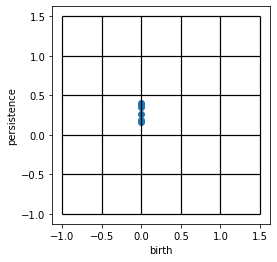

In [5]:
pers_imager.plot_diagram(pers_dgm, skew=True)

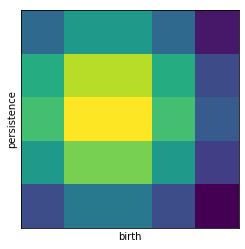

In [6]:
pers_imager.plot_image(pers_dgm, skew=True)

En las siguientes celdas construimos imágenes de persistencia con diferentes resoluciones.

In [ ]:
pers_imager.pixel_size = 1
print(pers_imager)

PersistenceImager object: 
  pixel size: 1 
  resolution: (3, 3) 
  birth range: (-1.25, 1.75) 
  persistence range: (-1.25, 1.75) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


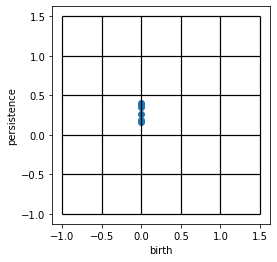

In [7]:
pers_imager.plot_diagram(pers_dgm, skew=True)

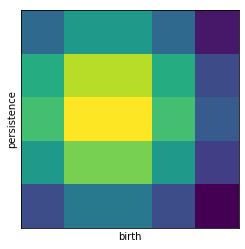

In [8]:
pers_imager.plot_image(pers_dgm, skew=True)

In [9]:
pers_imager.pixel_size = 0.03
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.03 
  resolution: (84, 84) 
  birth range: (-1.01, 1.51) 
  persistence range: (-1.01, 1.51) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


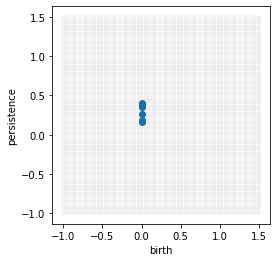

In [10]:
pers_imager.plot_diagram(pers_dgm, skew=True)

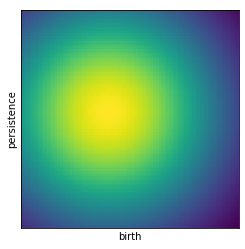

In [11]:
pers_imager.plot_image(pers_dgm, skew=True)